### Name        : AYUSH SWAMY
### PRN         : 240340128005
### Assignment  : 2 (Santander Customer Satisfaction)

In [1]:
!pip install kaggle==1.6.6

  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111941 sha256=1aa4afc9a411bf0c73a2a0b275bb1ab9267979702f47c2a587342173c978b088
  Stored in directory: /root/.cache/pip/wheels/53/34/8c/8ca3450d17206d9e37e1ee3aeb47cbb2873d22a9e0c60eb137
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.12
    Uninstalling kaggle-1.6.12:
      Successfully uninstalled kaggle-1.6.12


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-prize                 2024-06-27 23:59:00  Featured         $1,048,576        490           False  
https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability        2024-05-27 23:59:00  Featured           $105,000       3164           False  
https://www.kaggle.com/competitions/lmsys-chatbot-arena                            2024-08-05 23:59:00  Research           $100,000        185           False  
https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2  2024-07-02 23:59:00  Featured            $50,000       1242           False  
https://www.kaggle.com/competition

In [ ]:
#!kaggle competitions download -c santander-customer-satisfaction

 97% 8.00M/8.25M [00:00<00:00, 83.0MB/s]
100% 8.25M/8.25M [00:00<00:00, 84.5MB/s]


In [ ]:
#!unzip "/content/santander-customer-satisfaction.zip" -d "/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/"

Archive:  /content/santander-customer-satisfaction.zip
  inflating: /content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sample_submission.csv  
  inflating: /content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/test.csv  
  inflating: /content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/train.csv  


In [5]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


### Importing libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, log_loss, r2_score
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

### Installing catboost



2. Consider the dataset at the link Santander Customer Satisfaction | Kaggle. Do the following:</br>
Find out how many principal components explain more than 90% variation taking </br>all the variables except ID and target.
</br>Try the following models with PCA transform (Pipeline):
#### Random Forest
#### X G Boost
#### Cat Boost
#### Light GBM
Mention the leaderboard scores if possible




### Kaggle Scores with all submissions

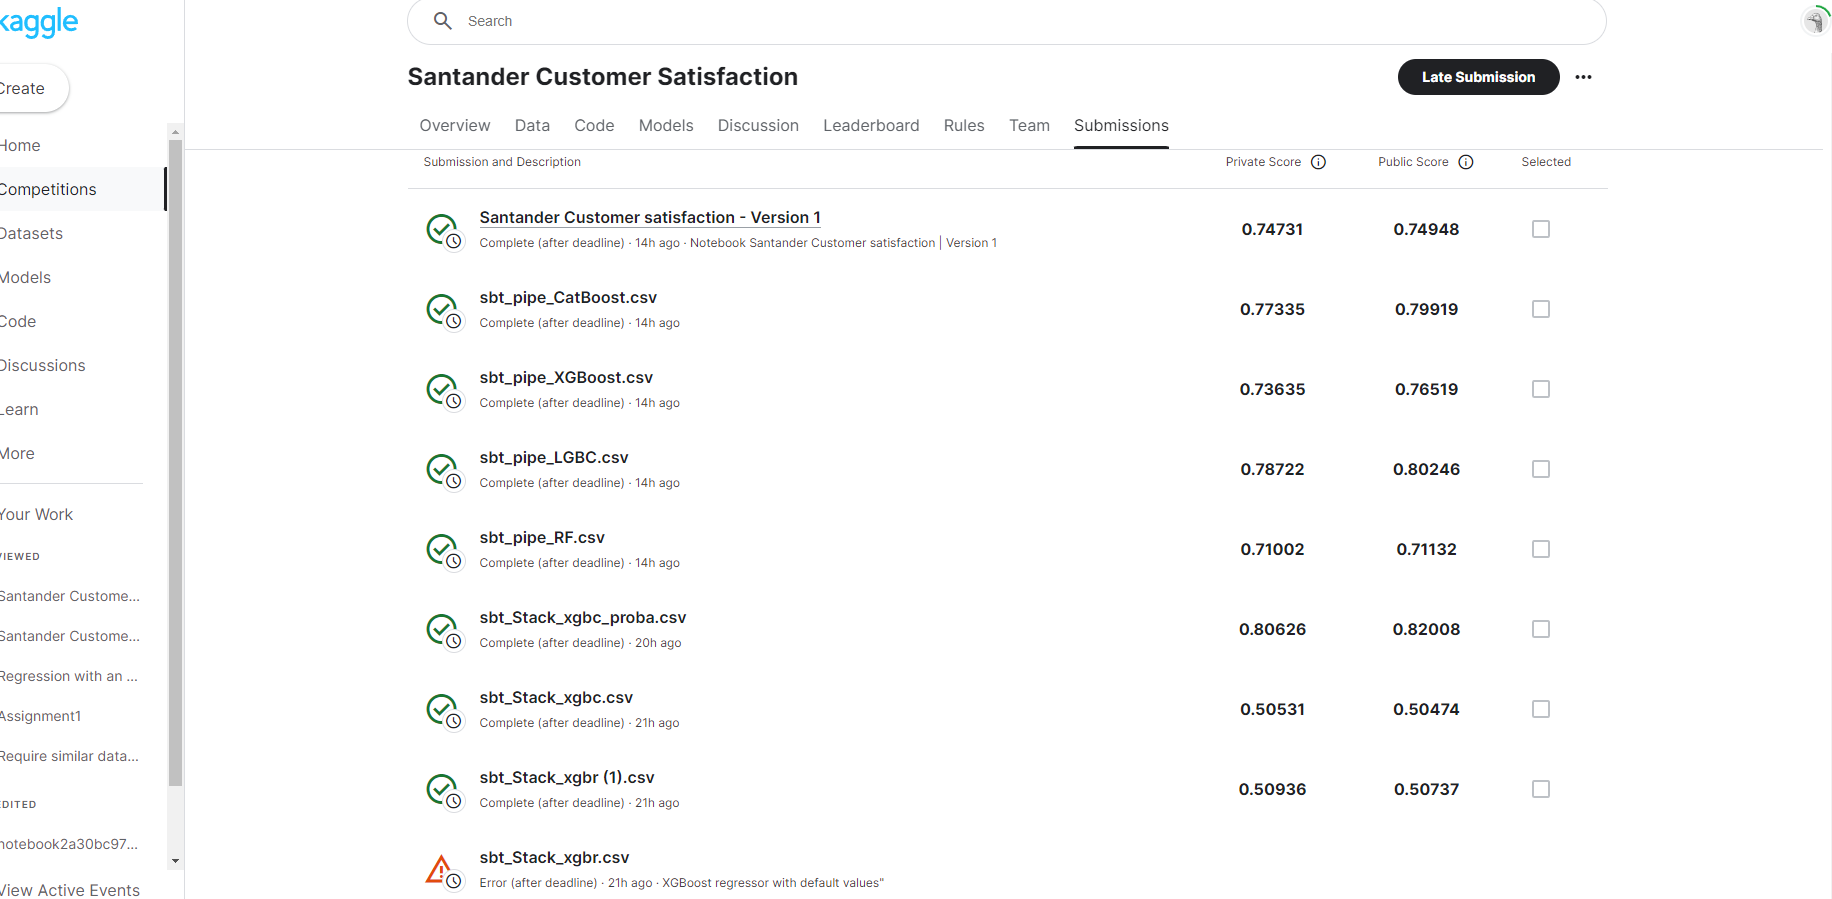

In [1]:
from IPython.display import Image
Image("kaggleScore.png")

### Loading dataset

In [7]:
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LinearRegression
#os.chdir(r'D:\CDAC MARCH 2024 AI\PML\Kaggle/1/')
# Flood Predicton Dataset
ftrain = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/train.csv', index_col=0)
ftest = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/test.csv')

In [ ]:
ftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
# X , Y and X_test

y = ftrain['TARGET']
# X = pd.get_dummies(ftrain.drop('TARGET',axis=1),drop_first=True)
X = ftrain.drop('TARGET',axis=1)
# X_test = pd.get_dummies(ftest.drop('ID',axis=1), drop_first=True)
X_test = ftest.drop('ID',axis=1)


In [10]:
# PCA
scalar = StandardScaler()
X_train = scalar.fit_transform(X)
pca = PCA().set_output(transform='pandas')

In [14]:
principalComponents = pca.fit_transform(X_train)


In [17]:
print(np.cumsum(pca.explained_variance_ratio_*100))
var = np.cumsum(pca.explained_variance_ratio_*100)

[  8.08168103  13.3106232   16.95454509  20.43333517  23.84787264
  26.96627881  29.9075361   32.73162056  35.34150046  37.90274151
  40.15734412  42.28950716  44.39937945  46.44371401  48.43174654
  50.18255229  51.81458538  53.37300957  54.76397238  56.08647535
  57.37833682  58.61314256  59.83699224  61.0173682   62.09358682
  63.15391115  64.18500302  65.1957877   66.1935251   67.15790285
  68.10927134  69.04437805  69.95917356  70.83304253  71.67976997
  72.48304949  73.21956183  73.93499664  74.611611    75.27828696
  75.92518036  76.55054338  77.17432345  77.78141646  78.38214297
  78.98091227  79.56219119  80.13942245  80.70891024  81.26143509
  81.78254267  82.29186949  82.73360732  83.1675606   83.58654435
  83.99795882  84.40507488  84.79537072  85.17822325  85.54942953
  85.91574213  86.27204106  86.62731363  86.95828963  87.28241489
  87.59168529  87.89402683  88.19240047  88.48901017  88.78308389
  89.066276    89.34449676  89.62125416  89.88732495  90.1429499
  90.394865

In [18]:
print("No of features that give variance more than 90 %: {}".format((var>90).sum()))

No of features that give variance more than 90 %: 295


In [19]:
rf = RandomForestClassifier(random_state=24)
xgbc = XGBClassifier(random_state=24)
l_gbmc = LGBMClassifier(random_state=24)
c_gbm = CatBoostClassifier(random_state=24)

In [20]:
scalar = StandardScaler()
pca = PCA().set_output(transform='pandas')
from sklearn.pipeline import Pipeline

In [ ]:
# declaring all classifiers

rf = RandomForestClassifier(random_state=24)
xgbc = XGBClassifier(random_state=24)
l_gbmc = LGBMClassifier(random_state=24)
c_gbm = CatBoostClassifier(random_state=24)

models_dict = {'RandomForestClassifier':rf,
               'XGBoostClassifier': xgbc,
               'LightXGBoostClassifier':l_gbmc,
               'CatBoostClassifier':c_gbm}
scores_dict = {}

In [21]:
# RAndom Forest
pipe =  Pipeline([("SCL", scalar),("PCA", pca),("RF",rf)])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)
df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred_proba[:,1]})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_pipe_RF.csv', index =False)

In [23]:
!kaggle competitions submit -c Santander_Customer_satisfaction -f '/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_pipe_RF.csv' -m "RandomForest with standar Scalar"

403 - Forbidden - Permission 'competitions.participate' was denied


In [26]:
# Cat_GBC
pipe =  Pipeline([("SCL", scalar),("PCA", pca),("CAT",c_gbm)])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)
df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred_proba[:,1]})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_pipe_CatBoost.csv', index =False)

Learning rate set to 0.065477
0:	learn: 0.5947395	total: 443ms	remaining: 7m 22s
1:	learn: 0.5179901	total: 758ms	remaining: 6m 18s
2:	learn: 0.4521037	total: 1.01s	remaining: 5m 35s
3:	learn: 0.3980196	total: 1.25s	remaining: 5m 12s
4:	learn: 0.3552839	total: 1.54s	remaining: 5m 7s
5:	learn: 0.3200513	total: 1.82s	remaining: 5m 1s
6:	learn: 0.2920431	total: 2.11s	remaining: 4m 59s
7:	learn: 0.2677932	total: 2.42s	remaining: 4m 59s
8:	learn: 0.2469083	total: 2.72s	remaining: 4m 59s
9:	learn: 0.2296542	total: 3.01s	remaining: 4m 58s
10:	learn: 0.2165480	total: 3.35s	remaining: 5m 1s
11:	learn: 0.2055076	total: 3.68s	remaining: 5m 2s
12:	learn: 0.1953220	total: 3.97s	remaining: 5m 1s
13:	learn: 0.1877842	total: 4.15s	remaining: 4m 52s
14:	learn: 0.1811039	total: 4.32s	remaining: 4m 43s
15:	learn: 0.1761500	total: 4.51s	remaining: 4m 37s
16:	learn: 0.1711053	total: 4.7s	remaining: 4m 31s
17:	learn: 0.1668350	total: 4.87s	remaining: 4m 25s
18:	learn: 0.1632984	total: 5.04s	remaining: 4m 20

In [25]:
# LGBC
pipe =  Pipeline([("SCL", scalar),("PCA", pca),("LGBC",l_gbmc)])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)
df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred_proba[:,1]})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_pipe_LGBC.csv', index =False)

[LightGBM] [Info] Number of positive: 3008, number of negative: 73012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.354209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94095
[LightGBM] [Info] Number of data points in the train set: 76020, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039569 -> initscore=-3.189348
[LightGBM] [Info] Start training from score -3.189348


In [ ]:
# XGBoost
pipe =  Pipeline([("SCL", scalar),("PCA", pca),("",xgbc)])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)
df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred_proba[:,1]})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_pipe_XGBoost.csv', index =False)

In [ ]:
# Staking Classifier

kFold = KFold(n_splits=5, random_state=24, shuffle=True)
params = {'max_depth': [None, 2, 3, 4],
          'n_estimators': [25, 50, 100],
          'min_samples_leaf':np.arange(1,10,5),
          'min_samples_split':np.arange(1,10,5)}

#from sklearn.metrics import mean_squared_log_error
#gcv = GridSearchCV(xgbr, param_grid={}, cv=kFold, scoring='neg_mean_squared_error', n_jobs=-1)
#gcv.fit(X,y)
#y_pred = gcv.predict(X_test)



#models_dict = {}
from sklearn.linear_model import ElasticNet, LinearRegression
el = ElasticNet(random_state=24)

stack = StackingClassifier([('CAT',c_gbm), ('LGBMR', l_gbmc),('RF',rf),], passthrough=True, final_estimator=xgbc, verbose=4)
stack.fit(X,y)
y_pred = stack.predict(X_test)
#y_pred[y_pred<0] = 0
df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred})
df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_xgbc.csv', index =False)

!kaggle competitions submit -c Santander_Customer_satisfaction -f '/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_xgbc.csv' -m "XGBoost with default values"







Streaming output truncated to the last 5000 lines.
45:	learn: 0.1372245	total: 5.04s	remaining: 1m 44s
46:	learn: 0.1368773	total: 5.17s	remaining: 1m 44s
47:	learn: 0.1367429	total: 5.29s	remaining: 1m 45s
48:	learn: 0.1366266	total: 5.42s	remaining: 1m 45s
49:	learn: 0.1364202	total: 5.56s	remaining: 1m 45s
50:	learn: 0.1361512	total: 5.71s	remaining: 1m 46s
51:	learn: 0.1359695	total: 5.81s	remaining: 1m 45s
52:	learn: 0.1358258	total: 5.87s	remaining: 1m 44s
53:	learn: 0.1357700	total: 5.93s	remaining: 1m 43s
54:	learn: 0.1355224	total: 5.99s	remaining: 1m 42s
55:	learn: 0.1354236	total: 6.06s	remaining: 1m 42s
56:	learn: 0.1351913	total: 6.13s	remaining: 1m 41s
57:	learn: 0.1350722	total: 6.19s	remaining: 1m 40s
58:	learn: 0.1350342	total: 6.24s	remaining: 1m 39s
59:	learn: 0.1349327	total: 6.3s	remaining: 1m 38s
60:	learn: 0.1348818	total: 6.36s	remaining: 1m 37s
61:	learn: 0.1347512	total: 6.42s	remaining: 1m 37s
62:	learn: 0.1345705	total: 6.5s	remaining: 1m 36s
63:	learn: 0.13

In [ ]:

#y_pred[y_pred<0] = 0
y_pred_proba

array([[9.5376885e-01, 4.6231121e-02],
       [9.4384843e-01, 5.6151576e-02],
       [9.9988836e-01, 1.1164531e-04],
       ...,
       [9.9846858e-01, 1.5314200e-03],
       [9.4040346e-01, 5.9596520e-02],
       [9.9974507e-01, 2.5494734e-04]], dtype=float32)

In [ ]:

df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_xgbc_proba.csv', index =False)

In [ ]:

# y_pred[y_pred<0] = 0
# y_pred = y_pred.round()
# df = pd.DataFrame({'ID': ftest['ID'], 'TARGET':y_pred})
#df.to_csv('/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_xgbc.csv', index =False)

In [ ]:
!kaggle competitions submit -c Santander_Customer_satisfaction -f '/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_xgbc.csv' -m "XGBoost regressor with default values"

403 - Forbidden - Permission 'competitions.participate' was denied


In [ ]:
!kaggle competitions submit -c Santander_Customer_satisfaction -f '/content/drive/MyDrive/Kaggle_competitions/Santander_Customer_satisfaction/sbt_Stack_lgbm.csv' -m "Message"

100% 1.45M/1.45M [00:02<00:00, 671kB/s] 
Successfully submitted to Regression with an Abalone Dataset

In [ ]:
!kaggle competitions submissions Santander_Customer_satisfaction

fileName          date                 description  status    publicScore  privateScore  
----------------  -------------------  -----------  --------  -----------  ------------  
sbt_Stack_lr.csv  2024-05-08 16:51:40  Message      complete  0.16455      0.16529       
sbt_Stack_lr.csv  2024-05-08 16:46:41  Message      error                                
sbt_Stack_lr.csv  2024-05-08 16:41:43  Message      error                                
sbt_Stack_.csv    2024-05-08 16:20:52               complete  0.14926      0.14936       
sbt_Stack_.csv    2024-05-08 16:15:10  Message      error                                
sbt_Stack_.csv    2024-05-07 02:39:19  Message      error                                


Kaggle API 1.6.12
/bin/bash: line 1: Kaggle: command not found
